o código abaixo verificar o que tem dentro do Arquivo, mostrando se tem valores nulos, duplicadas e redundantes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
caminho_arquivo = 'basededados/MiniBooNE_PID.txt'

# Ler a primeira linha para obter o número de eventos de sinal e fundo
with open(caminho_arquivo, 'r') as file:
    primeira_linha = file.readline().strip().split()
    num_sinal = int(primeira_linha[0])  # Número de eventos de sinal
    num_fundo = int(primeira_linha[1])  # Número de eventos de fundo

# Carregar os dados a partir da segunda linha
data = pd.read_csv(caminho_arquivo, delimiter='\s+', header=None, skiprows=1)

# Adicionar rótulos
data['label'] = [1] * num_sinal + [0] * num_fundo  # Usando 1 para sinal e 0 para fundo

# 1. Análise Inicial
print("="*50)
print("ANÁLISE EXPLORATÓRIA BÁSICA")
print("="*50)

print("\nPrimeiras linhas dos dados:")
print(data.head())

print("\nÚltimas linhas dos dados:")
print(data.tail())

# 2. Verificação de Valores Nulos
print("\n" + "="*50)
print("VERIFICAÇÃO DE VALORES NULOS")
print("="*50)

print("\nTotal de valores nulos por coluna:")
print(data.isnull().sum())

print("\nTotal de valores nulos no dataset:", data.isnull().sum().sum())

# 3. Verificação de Dados Repetidos
print("\n" + "="*50)
print("VERIFICAÇÃO DE DADOS REPETIDOS")
print("="*50)

print("\nTotal de linhas duplicadas:", data.duplicated().sum())

if data.duplicated().sum() > 0:
    print("\nExemplo de linhas duplicadas:")
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head())
else:
    print("\nNenhuma linha duplicada encontrada.")

# 4. Verificação de Redundância (Correlação entre colunas)
print("\n" + "="*50)
print("VERIFICAÇÃO DE REDUNDÂNCIA (CORRELAÇÃO)")
print("="*50)

# Calcular matriz de correlação
corr_matrix = data.corr()

print("\nMatriz de correlação (apenas as primeiras 10 colunas):")
print(corr_matrix.iloc[:10, :10])

# Identificar pares de colunas altamente correlacionadas (threshold > 0.9)
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr:
    print("\nColunas altamente correlacionadas (|corr| > 0.9):")
    for pair in high_corr:
        print(f"Coluna {pair[0]} e {pair[1]}: {pair[2]:.4f}")
else:
    print("\nNenhum par de colunas altamente correlacionado encontrado.")

# 5. Estatísticas Descritivas
print("\n" + "="*50)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*50)

print("\nEstatísticas básicas de cada coluna:")
print(data.describe())

# Estatísticas por classe (sinal e fundo)
print("\nEstatísticas por classe (sinal=1, fundo=0):")
print(data.groupby('label').describe().transpose())

# 6. Distribuição das Classes
print("\n" + "="*50)
print("DISTRIBUIÇÃO DAS CLASSES")
print("="*50)

class_dist = data['label'].value_counts()
print("\nContagem de cada classe:")
print(class_dist)

print("\nProporção das classes:")
print(class_dist / len(data))

# Plotar distribuição das classes
plt.figure(figsize=(8, 6))
class_dist.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Fundo (0)', 'Sinal (1)'], rotation=0)
plt.show()

# 7. Valores Únicos
print("\n" + "="*50)
print("VALORES ÚNICOS POR COLUNA")
print("="*50)

print("\nNúmero de valores únicos por coluna:")
print(data.nunique())

# Verificar colunas com apenas um valor (constantes)
constant_cols = [col for col in data.columns if data[col].nunique() == 1]
if constant_cols:
    print("\nColunas com apenas um valor (constantes):", constant_cols)
else:
    print("\nNenhuma coluna constante encontrada.")

# 8. Histogramas das Features
print("\n" + "="*50)
print("HISTOGRAMAS DAS FEATURES")
print("="*50)

# Plotar histogramas para as primeiras 20 colunas (para não sobrecarregar)
n_cols_to_plot = min(20, len(data.columns) - 1)  # Excluindo a coluna de label
n_rows = (n_cols_to_plot // 5) + (1 if n_cols_to_plot % 5 else 0)

plt.figure(figsize=(20, 4 * n_rows))
for i, col in enumerate(data.columns[:n_cols_to_plot]):
    plt.subplot(n_rows, 5, i+1)
    data[col].hist(bins=50)
    plt.title(f'Coluna {col}')
    plt.tight_layout()
plt.show()

# 9. Boxplots por Classe (para as primeiras 5 features)
print("\n" + "="*50)
print("BOXPLOTS POR CLASSE (PRIMEIRAS 5 FEATURES)")
print("="*50)

plt.figure(figsize=(20, 10))
for i, col in enumerate(data.columns[:5]):
    plt.subplot(2, 3, i+1)
    data.boxplot(column=col, by='label')
    plt.title(f'Feature {col} por Classe')
    plt.suptitle('')  # Remover título automático
    plt.tight_layout()
plt.show()

# 10. Informações Gerais
print("\n" + "="*50)
print("INFORMAÇÕES GERAIS DO DATASET")
print("="*50)

print("\nInformações sobre o dataset:")
data.info()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
# carregar bibliótecas necessárias



## carregar o Arquivo e coloca em um rótulo baseado no seu valor
**caso o Arquivo contém dados irreguláres será necessário modifica o código ou adapta os dados**
ele também remover dados nulos e duplicadas

In [ ]:
import pandas as pd
import numpy as np

# Caminho para o arquivo (substitua pelo caminho correto)
caminho_arquivo = 'basededados/MiniBooNE_PID.txt'

# Carregar os dados
try:
    # Ler a primeira linha para obter o número de eventos de sinal e fundo
    with open(caminho_arquivo, 'r') as file:
        primeira_linha = file.readline().strip().split()
        num_sinal = int(primeira_linha[0])  # Número de eventos de sinal
        num_fundo = int(primeira_linha[1])  # Número de eventos de fundo

    # Carregar os dados a partir da segunda linha
    data = pd.read_csv(caminho_arquivo, delimiter='\s+', header=None, skiprows=1)

    # Remover valores nulos, se houver
    data.dropna(inplace=True)

    # Remover linhas duplicadas
    data.drop_duplicates(inplace=True)

    # Garantir que o número de rótulos corresponda ao número de linhas nos dados
    total_registros = len(data)
    num_sinal = min(num_sinal, total_registros)
    num_fundo = min(num_fundo, total_registros - num_sinal)

    # Criar rótulos
    y = np.concatenate([np.ones(num_sinal), np.ones(num_fundo) * -1])
    data = data.iloc[:len(y)]  # Garantir que os dados e os rótulos tenham o mesmo tamanho
    data['label'] = y

    print("Dados carregados com sucesso!")
    print("Formato dos dados após limpeza:", data.shape)
    print("\nPrimeiras linhas dos dados limpos:")
    print(data.head())

except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")

# Reduzir o número de dados para 10000 (opcional)
data_reduzido = data.sample(n=min(10000, len(data)), random_state=10)

# Separar features (X) e rótulos (y)
X = data_reduzido.iloc[:, :-1].values  # Todas as colunas, exceto a última (rótulos)
y = data_reduzido.iloc[:, -1].values   # Última coluna (rótulos)

# Verificar os dados reduzidos
print("\nFormato dos dados reduzidos (X_reduzido):", X.shape)
print("Formato dos rótulos reduzidos (y_reduzido):", y.shape)


In [ ]:
# Verificar a distribuição das classes
from collections import Counter

class_counts = Counter(y)
print("\nDistribuição original das classes:")
print(f"Classe 1 (sinal): {class_counts[1]} amostras")
print(f"Classe -1 (fundo): {class_counts[-1]} amostras")
print(f"Proporção: {class_counts[1]}:{class_counts[-1]}")


Distribuição original das classes:
Classe 1 (sinal): 2731 amostras
Classe -1 (fundo): 7269 amostras
Proporção: 2731:7269


foi necessário usar um undersample para balancear os dados, caso o perceptron erra muito deve utiliza essa função abaixo algumas vezes para embaralhar os dados.

In [ ]:
def manual_undersample(X, y):
    # Contar as classes
    class_counts = Counter(y)
    minority_class = min(class_counts, key=class_counts.get)
    minority_count = class_counts[minority_class]

    # Separar por classes
    class_indices = {cls: np.where(y == cls)[0] for cls in class_counts}

    # Amostrar aleatoriamente
    sampled_indices = []
    for cls in class_counts:
        indices = class_indices[cls]
        if len(indices) > minority_count:
            indices = np.random.choice(indices, size=minority_count, replace=False)
        sampled_indices.extend(indices)

    # Embaralhar os índices
    np.random.shuffle(sampled_indices)

    return X[sampled_indices], y[sampled_indices]

# Aplicar undersampling
X_under, y_under = manual_undersample(X, y)

# Verificar o resultado
print("\nApós undersampling:")
print(f"Classe 1: {sum(y_under == 1)}")
print(f"Classe -1: {sum(y_under == -1)}")


Após undersampling:
Classe 1: 2731
Classe -1: 2731


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=45)
'''essa função separa os dados de X e Y entre treinamento e teste onde o test_size dividi em portagem,
exemplo, 0.2% 20% para teste e 80% para treino '''

print("Dados de treino (X_train):")
print(X_train)
print("Rótulos de treino (y_train):")
print(y_train)

print("\nDados de teste (X_test):")
print(X_test)
print("Rótulos de teste (y_test):")
print(y_test)

Dados de treino (X_train):
[[ 4.85497e+00  1.02924e+00  2.06170e+01 ...  5.63559e+00  2.69535e+00
   3.10087e-01]
 [ 3.49936e+00  2.89521e-01  8.75638e+01 ...  1.29392e+00  2.81602e-01
   2.47142e-01]
 [ 6.18179e+00  1.22595e+00  1.58676e+02 ...  2.54472e+00  1.51833e+00
   2.15121e-01]
 ...
 [ 3.53757e+00  2.17974e+00  5.40000e+01 ...  1.84457e+00 -1.59264e-01
   2.81750e-01]
 [ 3.68288e+00  1.35498e+00  3.23389e+01 ...  4.82532e-01 -8.11704e-02
   1.59590e-01]
 [ 4.03563e+00  1.78500e+00  8.84399e+01 ...  2.48215e+00 -3.36580e-01
   2.79736e-01]]
Rótulos de treino (y_train):
[ 1.  1. -1. ...  1. -1.  1.]

Dados de teste (X_test):
[[5.44967e+00 2.61474e+00 1.60619e+02 ... 4.01921e+00 5.43370e+00
  1.37087e-01]
 [6.85771e+00 1.51907e+00 7.43293e+01 ... 5.43909e+00 3.17305e+00
  1.87134e-01]
 [6.85666e+00 1.39564e+00 1.31669e+02 ... 2.58361e+00 1.64443e+00
  2.66166e-01]
 ...
 [3.84807e+00 1.65397e+00 1.26245e+02 ... 1.10406e+00 7.97017e-01
  2.04388e-01]
 [4.35648e+00 1.64692e+00 1.273

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate # taxa de aprendizado se for um valor baixo 0.001% então o acerto é alto mas demorado
        self.n_iters = n_iters # quantidades de interações em todos os conjuntos
        self.weights = None  # peso iniciado como none
        self.bias = None # bias como none
        self.errors = [] # quantidades de erros

    def fit(self, X, y):
        n_samples, n_features = X.shape # dividi entre linhas e colunas os pares de dados

        # Inicializar pesos e bias
        self.weights = np.zeros(n_features) # os pesos são iniciados em zero um para cada coluna
        self.bias = 0 # bias iniciado em zero

        ocorrencia=0 # para registra ocorrência de zero erro

        # Treinamento
        for _ in range(self.n_iters): # aqui acontece a quantidade de interação
            error = 0  # Contador de erros para a época atual
            for idx, x_i in enumerate(X): # X é separado entre conjuto x_i e o idx
                linear_output = np.dot(x_i, self.weights) + self.bias
                '''
                  o np.dot retorna o resultado da multiplicação entre o conjuto e os pesos, depois soma ao bias
                '''
                y_pred = np.where(linear_output >= 0, 1, -1) #se o linear_output for maior que zero o y_pred recebe 1 caso contraio recebe zero
                '''
                    observação caso ocorra erro verificar se a saída é 1 e 0 ou 1 e -1 , deve se binário
                '''

                # Armazenar o número de erros da época atual
                if y_pred != y[idx]:
                    # Atualizar pesos e bias
                    update = self.lr * (y[idx] - y_pred) # subtraia o label verdadeiro pela previsão e depois multiplica pela taxa de aprendizado
                    self.weights += update * x_i # atualiza os pesos multiplicando o erro com o conjuto
                    self.bias += update #atualiza o bias
                    error += 1  # Incrementar o contador de erros
                else:
                    ocorrencia+=1 # se não tiver erros a var 'ocorrencia' é incrementada

                self.errors.append(error)

                # Parar se não houver erros e tiver mais de 500 ocorrências de zeros erros então assumi que perceptron foi bem treinado
                if error == 0 and ocorrencia > 500:
                    break

    def predict(self, X): # faz a previsão
        linear_output = np.dot(X, self.weights) + self.bias
        print(f'taxaDeAprendizado: {self.lr}')
        print(f'pesos: {self.weights}')
        return np.where(linear_output >= 0, 1, -1)

# Função para plotar a taxa de aprendizado (erros ao longo das épocas)
def plot_learning_curve(errors):
    plt.plot(range(len(errors)), errors, marker='o')
    plt.xlabel('Época')
    plt.ylabel('Número de erros')
    plt.title('Taxa de aprendizado ao longo das épocas')
    plt.grid(True)
    plt.show()

# Função para plotar a fronteira de decisão
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prever a classe para cada ponto na grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar a fronteira de decisão
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()


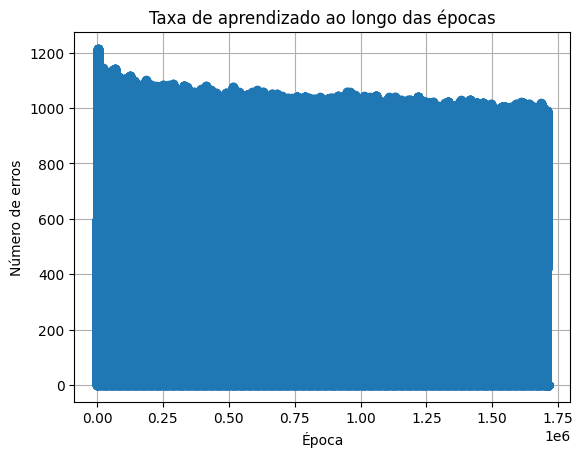

taxaDeAprendizado: 0.01
pesos: [-8.97179855e+02  1.22782283e+03 -5.05773489e+00 -7.08335486e+01
  1.51040501e+00  1.30801707e+02  5.68766358e+02  8.18971882e+01
  2.43710041e+02  8.61987067e+01  5.75113745e+02 -4.93548437e+00
 -1.41481358e+03 -9.29142220e+01 -6.97414662e+01  2.62320200e+01
  6.47956917e+01 -7.51335280e+01  1.25953192e+01  8.04352659e+02
  1.05462088e+03  3.15276581e+01  1.52395400e+02  4.78447831e+02
  1.04036210e+02  6.45294420e+02 -4.38005389e+01  1.28366050e+00
 -3.71017488e+01  4.29345924e+02 -5.23912101e+02  8.25330403e+02
 -2.55118982e+02 -2.00665240e+01  9.53564133e+00  1.43501271e+02
  8.15976590e+02 -6.23015118e+02 -5.85263463e+01  1.23266367e+01
 -6.29600820e+01  5.40052477e+01  6.31967327e+02 -3.48503992e+02
 -7.76469021e+00  6.21820140e+00  2.28679014e+02  5.58734058e+01
 -7.07714753e+02  2.70889998e+01]


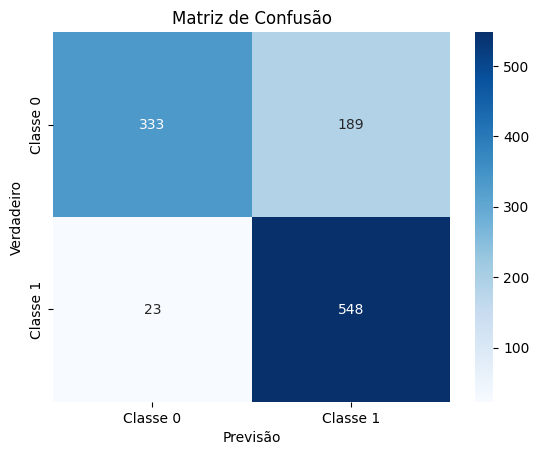

In [ ]:
# Criar e treinar o Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=3000)
perceptron.fit(X_train, y_train)

# Plotar a fronteira de decisão caso seja 2 features
#plot_decision_boundary(X_test, y_test, perceptron)

# Plotar a taxa de aprendizado
plot_learning_curve(perceptron.errors)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, perceptron.predict(X_test))

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

os gráficos acima mostram uma matriz de confusão e um plot de erros, o Perceptron treinar até alcança 500 interações sem erros ou números de épocas atingi o límite, fiz vários testes e todos eles mostram o mesmo padrão onde uma vez que acerta a previsão as próximas interações seram de acertos continuos